# House Prices Prediction

## Importing:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

# get_description() is a function to get the description of any column name or a value.
# It takes the column/value name, or any list of them:
from data_description import get_description

%matplotlib inline
sns.set_style('darkgrid')

### Importing the 'train.csv' and 'test.csv' files:

In [ ]:
train = pd.read_csv('data/train.csv', index_col='Id')
test = pd.read_csv('data/test.csv', index_col='Id')

In [3]:
# X_train is the training features data
X_train = train.drop(['SalePrice'], axis=1)
# y is the target variable [SalePrice]
y = pd.DataFrame(train['SalePrice'])

# X is the combination of the features data from 'train' and 'test'. This is where we'll deal with the NaV values.
X = pd.concat([X_train, test], axis=0)

## Exploratory Data Analysis

### Deviding the features into categorical and numerical:

In [4]:
categorical = [x for x in X.columns if X[x].dtype == 'object']
numerical = [x for x in X.columns if X[x].dtype != 'object']

print(f'Numerical variables [{len(numerical)}]:\n{numerical}')
print()
print(f'Categorical variables [{len(categorical)}]:\n{categorical}')

Numerical variables [36]:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical variables [43]:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',

### The features sliced into 5 sets:

In [5]:
feat_set1 = X.columns[0:16].tolist()
feat_set1

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle']

In [6]:
feat_set2 = X.columns[16:32].tolist()
feat_set2

['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure']

In [7]:
feat_set3 = X.columns[32:48].tolist()
fs3 = X[feat_set3] 
fs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFinType1  2840 non-null   object 
 1   BsmtFinSF1    2918 non-null   float64
 2   BsmtFinType2  2839 non-null   object 
 3   BsmtFinSF2    2918 non-null   float64
 4   BsmtUnfSF     2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   Heating       2919 non-null   object 
 7   HeatingQC     2919 non-null   object 
 8   CentralAir    2919 non-null   object 
 9   Electrical    2918 non-null   object 
 10  1stFlrSF      2919 non-null   int64  
 11  2ndFlrSF      2919 non-null   int64  
 12  LowQualFinSF  2919 non-null   int64  
 13  GrLivArea     2919 non-null   int64  
 14  BsmtFullBath  2917 non-null   float64
 15  BsmtHalfBath  2917 non-null   float64
dtypes: float64(6), int64(4), object(6)
memory usage: 387.7+ KB


In [8]:

feat_set3_nom = ['BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical']
feat_set3_ord = ['HeatingQC', 'CentralAir']
feat_set3_num = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']


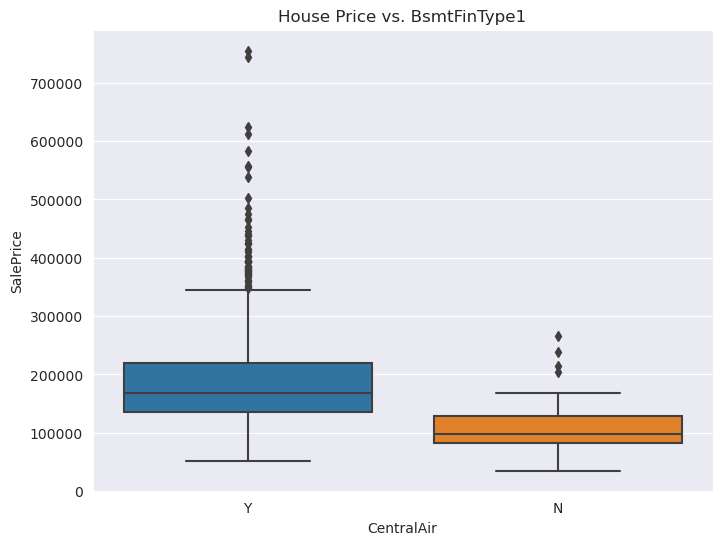

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.boxplot(x='CentralAir', y='SalePrice', data=train)
title = plt.title('House Price vs. BsmtFinType1')

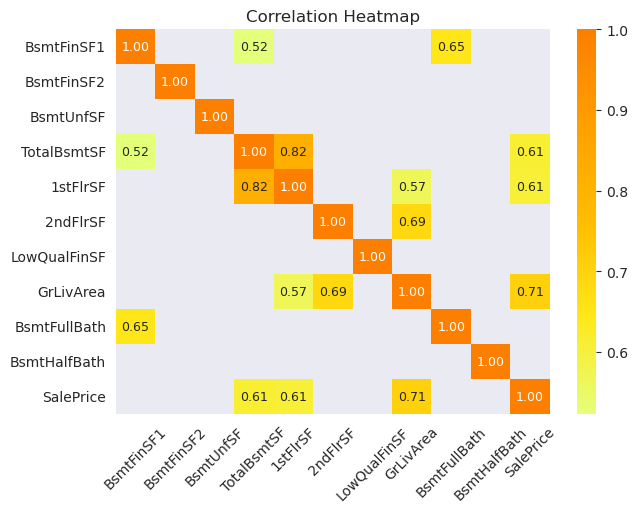

In [10]:
# Heatmap
corr_mat = train[feat_set3_num].corr()
corr_mat = corr_mat[abs(corr_mat) >= 0.5]
plt.figure(figsize=(7, 5))  # Set the size of the heatmap
ax = sns.heatmap(corr_mat, annot=True, cmap='Wistia', fmt=".2f", annot_kws={"fontsize": 9})
ax.set(title='Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0);


In [12]:
# Unique values of all categorical columns
dfx = train[["BsmtFinType1", "BsmtFinType2"]]
unique_sorted_df = pd.concat( [dfx[col].drop_duplicates().sort_values().reset_index(drop=True) 
                                for col in dfx] , axis = 1
                            )
print(unique_sorted_df)

  BsmtFinType1 BsmtFinType2
0          ALQ          ALQ
1          BLQ          BLQ
2          GLQ          GLQ
3          LwQ          LwQ
4          Rec          Rec
5          Unf          Unf
6          NaN          NaN


#### NaN values

In [82]:
# Null values
missing_data_count = X[feat_set3].isnull().sum()
missing_data_percent = X[feat_set3].isnull().sum() / len(X) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
print(missing_data.head(10),'\n')



rows_with_nan = fs3[fs3['BsmtFullBath'].isna() | fs3['Electrical'].isna()]
print(rows_with_nan)

print(fs3['Electrical'].mode())
print(fs3['Electrical'].value_counts())

"BsmtFinType1 : Rating of basement finished area"
"BsmtFinType2 : Rating of basement finished area (if multiple types)"
"BsmtFinSF1 : Type 1 finished square feet"
"BsmtFinSF2 : Type 2 finished square feet"
"BsmtUnfSF: Unfinished square feet of basement area"
"TotalBsmtSF: Total square feet of basement area"
"BsmtFullBath: Basement full bathrooms"
"BsmtHalfBath: Basement half bathrooms"

"All BF type NaN values can be replaced with NA "
"Because in row 2121 is all basement values Nan, SF valueas can be filled as 0"
"Basement Full and Half Bath Nan values can be filled with 0 because there is no basement"

"Electrical: Electrical system"
"SBrkr	Standard Circuit Breakers & Romex"
"FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	"
"FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)"
"FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)"
"Mix	Mixed"

"Electrical field NaN values can be replaced with its mod (SBrkr) "

There are 9 features having missing data.

Top 10 missing value features:
              Count   Percent
BsmtFinType2     80  2.740665
BsmtFinType1     79  2.706406
BsmtFullBath      2  0.068517
BsmtHalfBath      2  0.068517
BsmtFinSF1        1  0.034258
BsmtFinSF2        1  0.034258
BsmtUnfSF         1  0.034258
TotalBsmtSF       1  0.034258
Electrical        1  0.034258 

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1380          Unf         0.0          Unf         0.0      384.0   
2121          NaN         NaN          NaN         NaN        NaN   
2189          NaN         0.0          NaN         0.0        0.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
Id                                                                              
1380        384.0    GasA        Gd          Y        NaN       754       640   
2121          NaN    GasA        TA

'Electrical field NaN values can be replaced with its mod '

In [ ]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

In [36]:
numCols = list(fs3.select_dtypes(exclude='object').columns)
catCols = list(fs3.select_dtypes(include='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 10 numerical features:
 ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']
There are 6 categorical features:
 ['BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']


In [8]:
feat_set4 = X.columns[48:64].tolist()
feat_set4

['FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [9]:
feat_set5 = X.columns[64:80].tolist()
feat_set5

['PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

### Analysis:

## Preparing the Data:

### Missing Values:

In [14]:
missing_count = X.isna().sum(axis=0)
missing_percent = missing_count / len(X) * 100

missing_data = pd.DataFrame({
    'NaN Count': missing_count,
    'Percentage [%]': missing_percent
}).sort_values(by='NaN Count', ascending=False)
missing_data.index.name = 'Column Name'

missing_data = missing_data[missing_data['NaN Count'] > 0]
missing_data

,NaN Count,Percentage [%]
Column Name,,
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
